# Iterative Prisoner's Dilemma


### Description

The [Prisoner's Dilemma](https://en.wikipedia.org/wiki/Prisoner%27s_dilemma) (PD) is a classical game analyzed in game theory, which is widely used to (attempt to) model social/economical interaction. It's a "dilemma" as, if exploited to explain the emergence of altruism in human or in general animal society, it fails badly at a first glance.

The classical situation-representation of the PD is that of two prisoners whose conviction depends on their mutual cooperation. It is easier understood though if illustrated in terms of a trade-off game (closed bag exachange):

*Two people meet and exchange closed bags, with the understanding that one of them contains money, and the other contains a purchase. Either player can choose to honor the deal by putting into his or her bag what he or she agreed, or he or she can defect by handing over an empty bag.*

It is obvious that for both players the winning strategy is to NOT cooperate.

Things changes when the interaction between the two individuals is iterated, in that case a more altruist attitude (strategy) is expected to emerge. The goal of this project is to test this hypothesis.

Mathematically the PD can be expressed with very basic linear algebra. The key component is the **Payoff matrix** $M$, which quantify the reward each player gets depending on whether she cooperated or not (defect):

$$
M = 
\begin{pmatrix} 
R & S \\
T & P 
\end{pmatrix}
$$

with $T,R,S,P$ integers that satisfy the following conditions:

$$
T>R>P>S; \quad 2R > T+S
$$

for example $T=3$, $R=2$, $P=1$ and $S=0$, or  $T=5$, $R=3$, $P=2$, $S=0$. Each player choice (move) can be represented by one of the two axis in ${\rm I\!R}^2$, i.e. $u_C=\begin{pmatrix} 1 \\ 0 \end{pmatrix}$ or $u_D=\begin{pmatrix} 0 \\ 1 \end{pmatrix}$, where the first coordinate stands for *Cooperate* and the second for *Defect*. Being $u_1$ and $u_2$ their rewards $r_1$ and $r_2$ can be computed then as:

$$
r_1 = u_1^T M u_2
\quad
\quad
r_2 = u_2^T M u_1
$$

In an Iterative Prisoner's Dilemma (IPD), two players play prisoner's dilemma more than once in succession and they remember previous actions of their opponent and change their strategy accordingly. The winning strategy is the one which yields to a larger reward at the end of the IPD.

The strategy can be represented as a function which outputs either $u_C$ or $u_D$. Such function can depend on the opponent's history of moves, her on history of moves, on the number of moves played till that moment and so on, but it can only be based on a probability density function. Possible strategies are:

* **Nice guy**: always cooperate (the function's output is always $u_D$)
* **Bad guy**: always defect 
* **Mainly nice**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k<50$
* **Mainly bad**: randomly defect $k\%$ of the times and cooperate $100-k\%$, $k>50$
* **tit-for-tat**: start by cooperating, then repeat what the opponent has done in the previous move 

Many more and much more complex strategies can be implemented. The strategy can even change during the IPD.


### Assignments

* Implement a simple IPD between two players implementing two given strategies. Study the evolution along the tournament confronting different strategies; study the overall outcome in the different configurations. 
* Implement a multiple players IPD (MPIPD) where several strategies play against each other in a roud-robin scheme
* Iterate what done in the previous task (repeated MPIPD, rMPIPD)  by increasing the population implementing a given strategy depending on the results that strategy achieved in the previous iteration
* (*difficult*) Implement a rMPIPD where strategies are allowed to mutate. The goal is to simulate the effect of genetic mutations and the effect of natura selection. A parameter (gene) should encode the attidue of an individual to cooperate, such gene can mutate randomly and the corresponding phenotype should compete in the MPIPD such that the best-fitted is determined.  


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from numba import jit


In [22]:
from abc import ABC, abstractmethod

class Player(ABC):
    """Abstract class, declare the move method"""
    @abstractmethod
    def move(self):
        pass

In [23]:
class NiceGuy(Player):
    """
    Player that always outputs the cooperate move
    """
    def __init__(self, r_history=[], move_history=[]):
        self.r_history = r_history
        self.move_history = move_history  
        
    def append_reward(self, reward):
        self.r_history.append(reward)
        
    def move(self):
        uc = [1,0]
        self.move_history.append(uc)
        return uc

    
class BadGuy(Player):
    """
    Player that always outputs the defect move
    """
    def __init__(self, r_history=[], move_history=[]):
        self.r_history = r_history
        self.move_history = move_history
        
    def append_reward(self, reward):
        self.r_history.append(reward)
        
    def move(self):
        ud = [0,1]
        self.move_history.append(ud)
        return ud

    
class KBadGuy(Player):
    """
    Player that outputs the defect move 
    with probability k/100
    """
    def __init__(self, k, r_history=[], move_history=[]):
        self.k = k
        self.r_history = r_history
        self.move_history = move_history
        
    def append_reward(self, reward):
        self.r_history.append(reward)
        
    def move(self):
        uc = [1,0]
        ud = [0,1]
#         asd = np.random.rand() 
        if np.random.rand() > 1-(self.k/100):
            u = ud
        else:
            u = uc        
        self.move_history.append(u)
        return u
 

class Tit4Tat(Player):
    """
    Player, the first move is cooperate, 
    the subsequent moves are the same as the last 
    element in self.input_history
    """
    def __init__(self, r_history=[], move_history=[], input_history=[]):
        self.r_history = r_history
        self.move_history = move_history 
        self.input_history = input_history
        
    def append_reward(self, reward):
        self.r_history.append(reward)
        
    def append_input(self, inp):
        self.input_history.append(inp)
        
    def move(self):
        if len(self.input_history) == 0:
            u = [1,0]
        else:
            u = self.input_history[-1]
        self.move_history.append(u)
        return u

define a generic player class

In [45]:
# TODO
# class MultiPolicyPlayer(Player):
#     """
#     Player that define multiple behaviours
#     TODO
#     """
    
#     def __init__(self, r_history=[], move_history=[], input_history=[]):
#         self.r_history = r_history
#         self.move_history = move_history 
#         self.input_history = input_history

more complex player that learns from past rewards

In [33]:
class LearningPlayer(Player):
    """
    Player that use past rewards in order to decide the next move
    """
    def __init__(self, r_history=[], move_history=[]):
        self.r_history = r_history
        self.move_history = move_history 
    
    def append_reward(self, reward):
        self.r_history.append(reward)
    

    def move(self):
        # the whole method is implemented with lists
        # because i wanted to use Numba but it doesn't work
        # on member functions :(
        # maybe is better to use numpy
        
        # random move if its the first move
        if len(self.r_history) == 0:
            if np.random.rand() >= 0.5:
                u = [1,0]
            else:
                u = [0,1]
        else:
            move_cat_history = [move[0] for move in self.move_history]
            move_cat_history = [-1 if move == 0 else 1 for move in move_cat_history]
            r_cat_history = []
            for i in range(len(self.r_history)):
                r_cat_history.append(self.r_history[i] * move_cat_history[i])
            if sum(r_cat_history) > 0:
                # cooperate if rewards>0
                u = [1,0]
            elif sum(r_cat_history) < 0:
                # defect if rewards<0
                u = [0,1]
            else:
                # random choice if parity
                if np.random.rand() >= 0.5:
                    u = [1,0]
                else:
                    u = [0,1]
                
        self.move_history.append(u)
        return u 

## Examples of players classes

In [26]:
nice_guy = NiceGuy()

for i in range(10):
    u = nice_guy.move()
print(u)
print(nice_guy.move_history)
print(nice_guy.r_history)


[1, 0]
[[1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0], [1, 0]]
[]


In [27]:
pino = KBadGuy(30)
for i in range(10):
    u = pino.move()
print(u)
print(pino.move_history)

[1, 0]
[[1, 0], [1, 0], [0, 1], [1, 0], [1, 0], [1, 0], [0, 1], [0, 1], [1, 0], [1, 0]]


In [28]:

t4t_guy = Tit4Tat()
u = t4t_guy.move()
print("first move ",u)

print(t4t_guy.move_history)
t4t_guy.input_history.append([0,1])
u = t4t_guy.move()
print("second move (mirrored) ", u)

first move  [1, 0]
[[1, 0]]
second move (mirrored)  [0, 1]


In [29]:
learner = LearningPlayer([],[])
print(learner.move())

[1, 0]


## Experiment with players interaction

In [30]:
# Payoff matrix
M = np.array([[2,0],[3,1]])

# for practicity we are using u as horizontal arrays
# initialize players instances
p1 = Tit4Tat([],[],[])
p2 = KBadGuy(40,[],[])

# game loop
for i in range(100):
    u1 = p1.move()
    u2 = p2.move()
    #append p2 move, necessary for the tit4tat
    p1.append_input(u2)
    
    p1.append_reward(np.array(u1) @ M @ np.array(u2).T)
    p2.append_reward(np.array(u2) @ M @ np.array(u1).T)

player1 final reward  154
player2 final reward  157


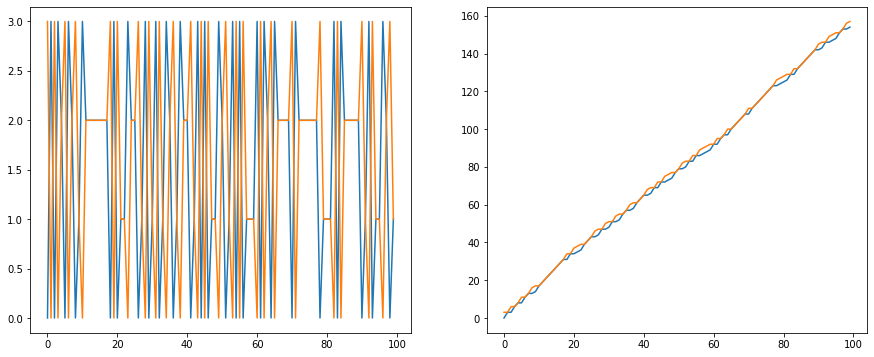

In [31]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].plot(p1.r_history)
ax[0].plot(p2.r_history)
ax[1].plot(np.cumsum(p1.r_history))
ax[1].plot(np.cumsum(p2.r_history))


print("player1 final reward ", sum(p1.r_history))
print("player2 final reward ", sum(p2.r_history))

Experiment with interaction of learning players
idea: make learning player with limited memory?

In [63]:
# Payoff matrix
M = np.array([[2,0],[3,1]])

p1 = KBadGuy(40,[],[])
p2 = LearningPlayer([],[])
print(p2.move_history)

for i in range(100):
    u1 = p1.move()
    u2 = p2.move()
    
    p1.append_reward(np.array(u1) @ M @ np.array(u2).T)
    p2.append_reward(np.array(u2) @ M @ np.array(u1).T)

[]


KBadGuy final reward  46
LearningPlayer final reward  214


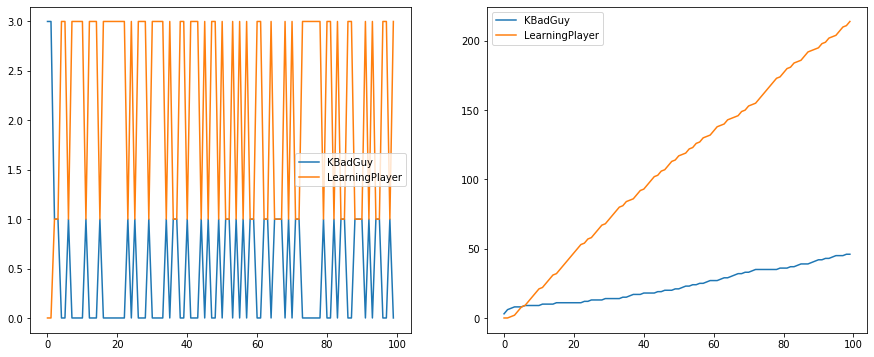

In [64]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].plot(p1.r_history, label='KBadGuy')
ax[0].plot(p2.r_history, label='LearningPlayer')
ax[0].legend()
ax[1].plot(np.cumsum(p1.r_history), label='KBadGuy')
ax[1].plot(np.cumsum(p2.r_history), label='LearningPlayer')
ax[1].legend()


print("KBadGuy final reward ", sum(p1.r_history))
print("LearningPlayer final reward ", sum(p2.r_history))

In [50]:
print(p2.move_history)

[[1, 0], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]


In [53]:
# Payoff matrix
M = np.array([[2,0],[3,1]])

p1 = LearningPlayer([],[])
p2 = LearningPlayer([],[])

for i in range(100):
    u1 = p1.move()
    u2 = p2.move()
    
    p1.append_reward(np.array(u1) @ M @ np.array(u2).T)
    p2.append_reward(np.array(u2) @ M @ np.array(u1).T)

KBadGuy final reward  98
LearningPlayer final reward  104


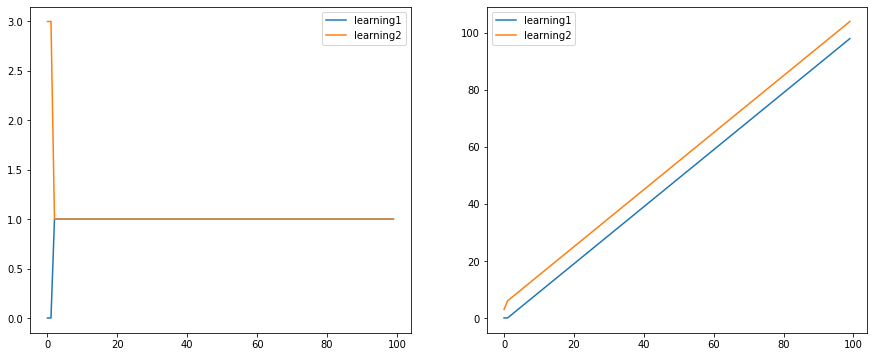

In [56]:
fig, ax = plt.subplots(1,2, figsize = (15,6))
ax[0].plot(p1.r_history, label='learning1')
ax[0].plot(p2.r_history, label='learning2')
ax[0].legend()
ax[1].plot(np.cumsum(p1.r_history), label='learning1')
ax[1].plot(np.cumsum(p2.r_history), label='learning2')
ax[1].legend()


print("KBadGuy final reward ", sum(p1.r_history))
print("LearningPlayer final reward ", sum(p2.r_history))
